# Pandas(Python Data Analysis Library)

- 데이터를 수집하고 정리하는데에 최적화된 도구(라이브러리)
- 오픈소스
- 파이썬 언어 기반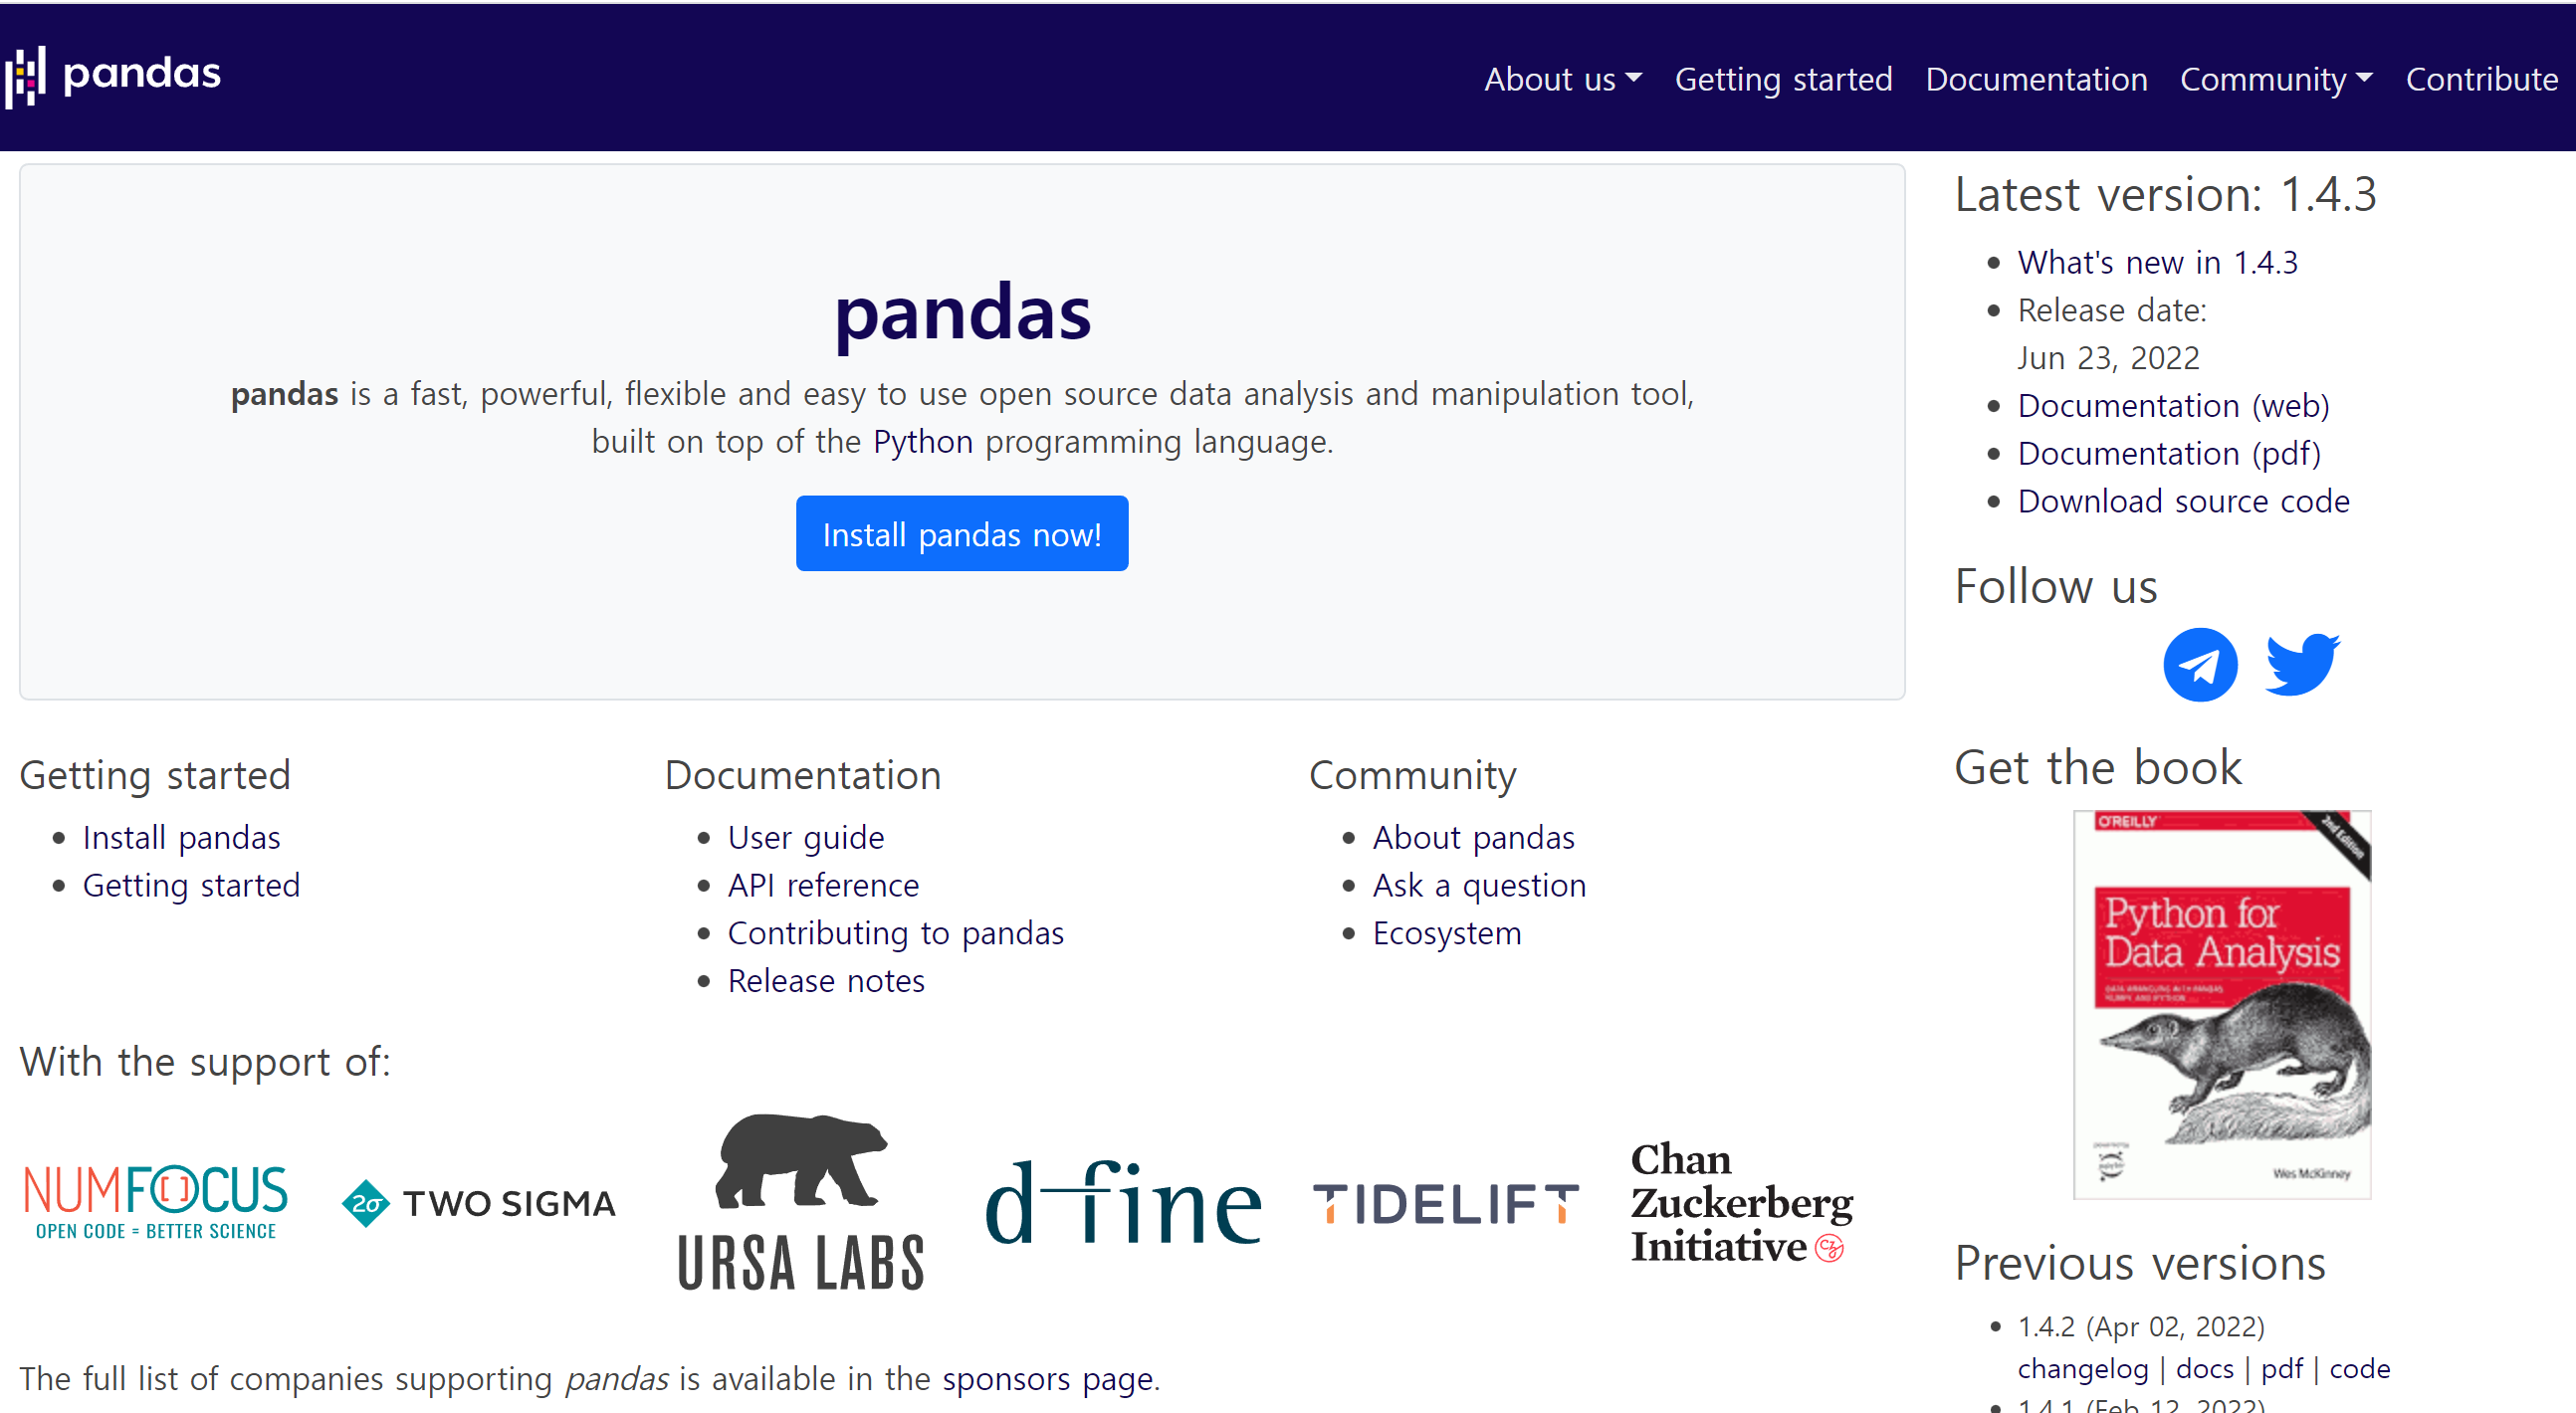

## Pandas자료 구조 소개
- 다양한 형태의 데이터 및 파일을 일관된 형태(포멧)로 정리
- Series(1차원)  =>  열
- DataFrame(2차원)

---

## Series(시리즈)
- 인덱스가 있는 1차원 배열 형태의 자료형
- 인덱스(Key)와 값(Value)으로 구성 
  - {k:v}
- 파이썬 딕셔너리와 유사한 구조

---

### 시리즈 만들고 사용하기
- 딕셔너리 자료구조와 유사하기 때문에 딕셔너리를 시리즈로 변환하는 방법을 많이 사용
- pandas라이브러리의 Series() 내장 함수를 사용

#### 파이썬 딕셔너리로 시리즈 생성

- 딕셔너리 생성

In [1]:
dict_data = {'a':1, 'b':2, 'c':3}
print(dict_data)

{'a': 1, 'b': 2, 'c': 3}


In [2]:
# 판다스 라이브러리 로딩

import pandas as pd

In [3]:
# 시리즈 생성
sr = pd.Series(dict_data)

# 시리즈 타입 확인
type(sr)

pandas.core.series.Series

In [4]:
# 시리즈 출력
sr

a    1
b    2
c    3
dtype: int64

- 인덱스의 종류
    - 정수형 위치 인덱스(Default)
        - 0, 1, 2, 3, ...
    - 인덱스 이름(Option)
        - 'a', 'b', 'c'

- 시리즈의 인덱스 확인

In [5]:
sr.index

Index(['a', 'b', 'c'], dtype='object')

- 시리즈의 값 전체 확인

In [6]:
sr.values

array([1, 2, 3], dtype=int64)

#### 파이썬 리스트로 시리즈 생성
   - 값의 개수만큼 RangeIndex객체로 표시됨(시작값: 0)

In [7]:
# 판다스 라이브러리 로딩
import pandas as pd

# 리스트 생성
list_data = ['2020-01-02', 3.14, 'Hello', 100, True]

# 리스트를 이용하여 시리즈 생성
sr = pd.Series(list_data)
sr

0    2020-01-02
1          3.14
2         Hello
3           100
4          True
dtype: object

In [8]:
# 시리즈의 인덱스와 값 확인
idx = sr.index
vals = sr.values
print(idx)
print(vals)

RangeIndex(start=0, stop=5, step=1)
['2020-01-02' 3.14 'Hello' 100 True]


In [9]:
for i in idx:
    print(sr[i])

2020-01-02
3.14
Hello
100
True


#### 시리즈의 원소 선택하기
   - 시리즈객체[정수형인덱스]
   - 시리즈객체['인덱스명']
   - 시리즈객체["인덱스명"]
   - 시리즈객체.인덱스명
   - 슬라이싱 가능

In [10]:
# 시리즈 생성
sr1 = pd.Series(['2020-01-02', 3.14, 'Hello', 100, True])
sr2 = pd.Series({'a':1, 'b':2, 'c':3})

In [11]:
# 시리즈 데이터 접근 확인
print(sr1[0])
print(sr1[3])
print(sr2['c'])
print(sr2.b)
print(sr2["a"])

2020-01-02
100
3
2
1


In [12]:
# 시리즈 슬라이싱
print(sr[:2])
print(sr[2:])
print(sr[2:3])
print(sr[1:])

0    2020-01-02
1          3.14
dtype: object
2    Hello
3      100
4     True
dtype: object
2    Hello
dtype: object
1     3.14
2    Hello
3      100
4     True
dtype: object


#### 투플을 시리즈로 변환
   - 리스트나 투플을 시리즈로 변환할 때 인덱스 지정 가능
   - 시리즈 생성 시 다음과 같이 인덱스 파라미터추가 
        - pd,Series(data, index=['a', 'b',..])

In [13]:
import pandas as pd

# 튜플 생성
tup_data = ('홍길동', '2000-12-23', '남', True)

# 튜플로 시리즈 생성
sr3 = pd.Series(tup_data, index=['이름', '생년월일', '성별', '수강여부'])          # 인덱스 키워드를 정해서 입력 가능 
print(sr3)                                                                         # 인덱스 키워드 지정 안할 시 숫자 0부터 ~

이름             홍길동
생년월일    2000-12-23
성별               남
수강여부          True
dtype: object


In [14]:
sr3.index

Index(['이름', '생년월일', '성별', '수강여부'], dtype='object')

In [15]:
sr3.values

array(['홍길동', '2000-12-23', '남', True], dtype=object)

- 시리즈에서 여러 인덱스로 값 가져오기
    - 시리즈 객체에 인덱스를 리스트 형태로 여러 개 지정
        - ex. 시리즈객체[['인덱스1', '인덱스2', ..]]
        - 정수형 인덱스 또는 인덱스 이름 중 한 가지 타입으로 통일 

In [16]:
# 정수형 인덱스로 가져오기
print(sr3[[1, 2]])                           # 인덱스 위치로 값 가져오기

생년월일    2000-12-23
성별               남
dtype: object


In [17]:
# 인덱스 이름으로 가져오기
print(sr3[['생년월일', '수강여부']])

생년월일    2000-12-23
수강여부          True
dtype: object


- 인덱스 범위 사용
    - 정수형 인덱스로 범위를 사용하면 마지막 요소가 포함되지 않음
    - 인덱스 이름을 이용하면 마지막 요소까지 포함

In [18]:
# 정수형 인덱스로 범위만큼 가져오기
print(sr3[1:2])

생년월일    2000-12-23
dtype: object


In [19]:
print(sr3[['이름','성별']])

이름    홍길동
성별      남
dtype: object


---

## DataFrame(데이터프레임)
- 2차원 배열 형태 (엑셀, RDBMS 등)
- 시리즈 배열
- 시리즈는 열벡터(vector)
- 데이터프레임은 열벡터들이 같은 행 인덱스를 기준으로 결합된 2차원 벡터 또는 행렬(matrix)
- 행 인덱스(row index)와 열 이름(column name or column label)으로 구분
- 열(column)은 공통의 속성을 갖는 일련의 데이터
- 행은 개별 관측 대상에 대한 다양한 속성 모음(record)

---

### 데이터프레임 만들고 사용하기
- 시리즈의 집합
- pandas라이브러리의 DataFrame() 내장 함수를 사용

#### 리스트를 값으로 갖는 딕셔너리를 이용하여 데이터프레임 생성

In [1]:
import pandas as pd

dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10, 11, 12], 'c4':[13,14,15]}

df = pd.DataFrame(dict_data)

- 타입 확인

In [2]:
# 데이터프레임 타입 확인
print(type(df))

<class 'pandas.core.frame.DataFrame'>


- print()함수로 데이터프레임 출력

In [3]:
# 데이터프레임 출력
print(df)

   c0  c1  c2  c3  c4
0   1   4   7  10  13
1   2   5   8  11  14
2   3   6   9  12  15


- 주피터 노트북에서 직접 출력 가능(가독성 좋음)

In [4]:
# 주피터 노트북에서 직접 출력
df

,c0,c1,c2,c3,c4
0,1,4,7,10,13
1,2,5,8,11,14
2,3,6,9,12,15


#### 행 인덱스와 열 이름 지정
   - 2차원 배열 형태의 데이터는 데이터프레임으로 변환이 용이
   - ex. 여러 개의 리스트(투플)을 원소로 갖는 리스트(투플)
   - 데이터프레임 생성 시 행 인덱스와 열 이름을 직접 지정할 수 있음

In [8]:
import pandas as pd

# 2차원 리스트 생성
data = [
    [27, '남', '당구'], 
    [19, '여', '볼링']
]

# 데이터프레임 생성(index는 '홍길동', '신사임당',  columns는 '나이', '성별', '취미'로 지정)
df = pd.DataFrame(data, 
                  index=['홍길동', '신사임당'],               # index는 각 행을 구분하는 값
                  columns=['나이', '성별', '취미']             # columns는 각 열을 구분하는 값
                 )               

df

,나이,성별,취미
홍길동,27,남,당구
신사임당,19,여,볼링


In [9]:
# 데이터프레임의 인덱스 확인

df.index

Index(['홍길동', '신사임당'], dtype='object')

In [10]:
# 데이터프레임의 컬럼이름 확인

df.columns

Index(['나이', '성별', '취미'], dtype='object')

- 행 인덱스와 열 인덱스 전체 변경(새로운 배열을 이용하여 변경 가능)

In [12]:
# 인덱스를 "학생1", "학생2"로 변경
df.index = ["학생1", "학생2"]

# 컬럼이름을 "연령", "남녀", "특기"로 변경
df.columns = ["연령", "남녀", "특기"]

In [13]:
# 데이터프레임 출력

df

,연령,남녀,특기
학생1,27,남,당구
학생2,19,여,볼링


### rename()   :   행과 열의 이름을 변경

- 행 인덱스와 열 이름의 부분 변경
- 데이터프레임의 rename() 함수 사용
- rename()함수는 변경된 데이터프레임을 반환 (원본은 변경되지 않음)
- 원본을 변경하려는 경우 다시 대입하거나 inplace=True 필요

In [14]:
import pandas as pd

# 2차원 리스트 생성
data = [
    [27, '남', '당구'], 
    [19, '여', '볼링']
]

# 데이터프레임 생성(index는 '홍길동', '신사임당',  columns는 '나이', '성별', '취미'로 지정)

df = pd.DataFrame(data, 
                  index=['홍길동', '신사임당'],              
                  columns=['나이', '성별', '취미']) 

df

,나이,성별,취미
홍길동,27,남,당구
신사임당,19,여,볼링


In [19]:
# 데이터프레임의 컬럼 변경 (변경할 인덱스:새로운 인덱스와 같이 딕셔너리로 지정)
# columns={'나이':'연령', '취미':'특기'}

#df = df.rename(columns={'나이':'연령', '취미':'특기'})             # 나이 --> 연령으로,  취미 --> 특기로 변경 
df.rename(columns={'나이':'연령', '취미':'특기'}, inplace=True)    # 원본 변경 시 df로 다시 대입해주거나, inplace=True로 원본 변경 가능.

In [22]:
# 데이터프레임의 인덱스 변경(변경할 컬럼명:새로운 컬럼명과 같이 딕셔너리로 지정)
# index={'홍길동':'수강생1', '신사임당':'수강생2'}

df.rename(index={'홍길동':'수강생1', '신사임당':'수강생2'})

,연령,성별,특기
수강생1,27,남,당구
수강생2,19,여,볼링


In [23]:
# 원본은 변화 없음
df

,연령,성별,특기
홍길동,27,남,당구
신사임당,19,여,볼링


### rename()메서드는 새로운 데이터프레임을 반환
- 원본에 바로 적용하려면 inplace옵션 추가

In [24]:
df = df.rename(columns={'나이':'연령', '취미':'특기'})
df

,연령,성별,특기
홍길동,27,남,당구
신사임당,19,여,볼링


In [25]:
df.rename(index={'홍길동':'수강생1', '신사임당':'수강생2'}, inplace=True)

In [26]:
df

,연령,성별,특기
수강생1,27,남,당구
수강생2,19,여,볼링


### 행/열 삭제
   - drop() 메서드 사용
   - 삭제된 데이터프레임 반환(원본 변경 시 대입 또는 inplace=True 필요)
   - 행 삭제 시 axis=0 (default)     
   - 열 삭제 시 axis=1
   - axis 를 통해 방향을 정할 수 있다.

In [27]:
import pandas as pd

# 닥셔너리 생성
exam_data = {
    '자바':[100, 89, 34],
    '파이썬':[99, 78, 98],
    '자료구조':[76, 45, 82],
    '장고':[56, 41, 92],
}

# 딕셔너리로 데이터프레임 생성(index는 '홍길동', '이순신', '강감찬'으로 설정)
df = pd.DataFrame(exam_data, index=['홍길동', '이순신', '강감찬'])
df

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [28]:
# 인덱스로 '홍길동' 행 삭제

df.drop('홍길동')                # 삭제된 DataFrame을 보여줌. (원본에는 영향이 없다.)

,자바,파이썬,자료구조,장고
이순신,89,78,45,41
강감찬,34,98,82,92


In [29]:
# 원본 데이터에는 영향 없음
df

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [30]:
# 열 이름으로 '자바'열 삭제(axis=1:열을 축으로, axis=0: 행을 축으로(기본값))

df.drop('자바', axis=1)

,파이썬,자료구조,장고
홍길동,99,76,56
이순신,78,45,41
강감찬,98,82,92


In [31]:
# 원본에 영향 없음
df

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [32]:
# 삭제된 데이터프레임을 다시 대입

df = df.drop('홍길동', axis=0)
df

,자바,파이썬,자료구조,장고
이순신,89,78,45,41
강감찬,34,98,82,92


In [34]:
# 원본 데이터프레임에 적용(inplace=)

df.drop('자바', axis=1, inplace=True)
df

,파이썬,자료구조,장고
이순신,78,45,41
강감찬,98,82,92


#### 행 선택하기 (loc, iloc)
- 데이터프레임에서 행을 선택하는 방법 두 가지
- loc(location) : 인덱스 이름을 기준. 범위 지정 시 마지막 포함
- iloc(정수형) : 정수형 인덱스 기준. 범위 지정 시 마지막 미포함

In [36]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '자바':[100, 89, 34],
    '파이썬':[99, 78, 98],
    '자료구조':[76, 45, 82],
    '장고':[56, 41, 92],
}

# 딕셔너리로 데이터프레임 생성(index를 '홍길동', '이순신', '강감찬'으로 적용)
df = pd.DataFrame(exam_data, index=['홍길동', '이순신', '강감찬'])
df

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [37]:
# loc를 이용하여 홍길동 행 선택

label1 = df.loc['이순신']                          # loc으로 이순신의 정보를 찾음 (인덱스 이름을 기준으로)
label1

자바      89
파이썬     78
자료구조    45
장고      41
Name: 이순신, dtype: int64

In [39]:
type(label1)                                       # 자료형 = Series

pandas.core.series.Series

In [38]:
# iloc를 이용하여 0번 행 선택

pos1 = df.iloc[0]                                  # 0번 행의 정보를 찾음.
pos1

자바      100
파이썬      99
자료구조     76
장고       56
Name: 홍길동, dtype: int64

In [40]:
type(pos1)                                         # 자료형 = Series

pandas.core.series.Series

In [42]:
df

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [41]:
# 데이터프레임에 인덱스 리스트를 전달하면 매치되는 행 모두 선택(['홍길동', '이순신'] 전달)

label2 = df.loc[['홍길동', '이순신']]              # 찾으려는 값을 리스트로 묶어서
label2

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41


In [43]:
# 데이터프레임에 인덱스 리스트를 전달하면 매치되는 행 모두 선택([1,2] 전달)

pos2 = df.iloc[[1,2]]                              # iloc => 인덱스 번호로 원하는 값 가져오기
pos2

,자바,파이썬,자료구조,장고
이순신,89,78,45,41
강감찬,34,98,82,92


In [44]:
# 레이블을 이용하여 슬라이싱하면 마지막 행 포함(['홍길동':'강감찬'] 전달)

label3 = df.loc['홍길동':'강감찬']                 # 슬라이싱 할 때는 []로 묶을 필요 없음. 
label3

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41
강감찬,34,98,82,92


In [45]:
# 레이블을 이용하여 슬라이싱하면 마지막 행 포함 안 함([0:2] 전달)

pos3 = df.iloc[0:2]
pos3

,자바,파이썬,자료구조,장고
홍길동,100,99,76,56
이순신,89,78,45,41


#### 열 선택하기
- 열 선택 시 열 이름(column name)을 활용
- 리스트 형식으로 선택할 열의 이름을 전달(1개만 전달할 경우 Series 반환)

In [46]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


- 하나의 열 선택하기 (Series 반환)

In [47]:
# 하나의 열 선택 시 시리즈가 반환됨(df['수학'])

math1 = df['수학']
math1

0     99
1     23
2     76
3    100
4    100
5     47
Name: 수학, dtype: int64

In [48]:
# 타입 확인
type(math1)

pandas.core.series.Series

In [49]:
# df.열이름으로 바로 사용 가능(df.영어)

eng1 = df.영어 
eng1

0    92
1    89
2    65
3    99
4    89
5    44
Name: 영어, dtype: int64

In [50]:
# 타입 확인
type(eng1)

pandas.core.series.Series

- 두 개 이상의 열 선택하기(DataFrame 반환)

In [51]:
# 열이름을 리스트로 전달하면 데이터프레임 반환(df[['국어', '영어']])

kor_eng = df[['국어', '영어']]
kor_eng

,국어,영어
0,100,92
1,90,89
2,34,65
3,0,99
4,100,89
5,0,44


In [52]:
# 타입 확인
type(kor_eng)

pandas.core.frame.DataFrame

In [54]:
df['과학']

0    88
1    49
2    83
3    14
4    64
5     0
Name: 과학, dtype: int64

In [53]:
# 컬럼이 하나라도 리스트로 전달하면 1개의 열이 있는 데이터프레임으로 반환(자주 사용됨)
# 머신러닝 라이브러리들이 제공하는 함수들이 2차원 데이터를 사용하는 경우가 많음
# df[['과학']]

sci = df[['과학']]                              # 인덱스 한번만 사용하여 출력하면 위와 같이 출력됨.
sci

,과학
0,88
1,49
2,83
3,14
4,64
5,0


In [55]:
# 타입 확인
type(sci)

pandas.core.frame.DataFrame

- iloc는 범위 슬라이싱 응용 가능
- df.iloc[시작:끝:간격]
- 간격을 지정하지 않으면 1

In [56]:
row = int(input('시작 행 입력:'))
col = int(input('끝 행 입력:'))
df.iloc[row:col:2]

시작 행 입력:0
끝 행 입력:6


,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
2,강감찬,34,76,65,55,83
4,신사임당,100,100,89,85,64


In [57]:
row = int(input('시작 행 입력:'))
col = int(input('끝 행 입력:'))
i = int(input('간격:'))
df.iloc[row:col:i]

시작 행 입력:0
끝 행 입력:6
간격:1


,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


#### 원소 선택하기
- [행,열] 좌표 형식을 이용하여 하나의 원소를 선택
- 1개의 원소를 선택하면 numpy의 자료형 객체 반환
- 1개의 행과 2개 이상의 열을 선택하면 시리즈 객체 반환
- 2개 이상의 행과 1개의 열을 선택하면 데이터프레임 객체 반환

In [58]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [59]:
# 원소 한 개 선택(첫 번째 행의 '수학'열) - df.loc[0, '수학']

a = df.loc[0, '수학'] 
a

99

In [60]:
# 타입 확인
type(a)

numpy.int64

In [61]:
# 첫 번째 행의 두 번째 값 - df.iloc[0][1]

a = df.iloc[0][1] 
a

100

In [62]:
# 타입 확인
type(a)

numpy.int64

In [63]:
# 원소 한 개 선택(첫 번째 행의 '국어'열) - df.loc[0]['국어']

a = df.loc[0]['국어'] 
a

100

In [64]:
# 원소 두 개 이상 선택(df[행번호, [선택할 열 리스트]]) - df.loc[0, ['수학', '영어']]

b = df.loc[0, ['수학','영어']] 
b

수학    99
영어    92
Name: 0, dtype: object

In [65]:
# 타입 확인
type(b)

pandas.core.series.Series

In [66]:
# 인덱스를 이름 열로 변경(inplace=True옵션을 추가하면 원본에 적용) - df.set_index('이름', inplace=True)

df.set_index('이름', inplace=True)                         # 기본 인덱스를 이름으로 설정
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,99,92,81,88
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [67]:
# 원소 한 개 선택('홍길동'행의 '수학'열) - df.loc['홍길동']['수학']

c = df.loc['홍길동']['수학']
c

99

In [68]:
# 타입 확인
type(c)

numpy.int64

In [69]:
# 원소 두 개 이상 선택('이순신'행의 , ['국어', '영어'])

d = df.loc['이순신', ['국어','영어']]
d

국어    90
영어    89
Name: 이순신, dtype: int64

In [70]:
# 데이터프레임의 기본 인덱스(숫자형)로 변경 - df.reset_index(inplace=True)

df.reset_index(inplace=True)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [71]:
# 행을 두 개 이상 선택([선택할 행 리스트], '열이름') - df.loc[[1,2], '과학']

e = df.loc[[1,2], '과학']
e

1    49
2    83
Name: 과학, dtype: int64

In [72]:
type(e)

pandas.core.series.Series

In [73]:
# 행(row) 두개 이상 열(column) 두개 이상([선택할 행 리스트], [선택할 열 리스트]) - df.loc[[1,2], ['사회', '과학']]

f = df.loc[[1,2],['사회','과학']]
f

,사회,과학
1,19,49
2,55,83


In [74]:
# 타입 확인
type(f)

pandas.core.frame.DataFrame

In [75]:
# :(콜론) 지정 시 모든 행에서 선택 - df.loc[:, ['영어', '과학']]

g = df.loc[:, ['영어', '과학']]                      # 모든 행을 지정
g

,영어,과학
0,92,88
1,89,49
2,65,83
3,99,14
4,89,64
5,44,0


In [76]:
# df.iloc[:, [1, 3]]

h = df.iloc[:, [1, 3]]
h

,국어,영어
0,100,92
1,90,89
2,34,65
3,0,99
4,100,89
5,0,44


In [77]:
# df.iloc[:, 1:4]

i = df.iloc[:, 1:4]
i

,국어,수학,영어
0,100,99,92
1,90,23,89
2,34,76,65
3,0,100,99
4,100,100,89
5,0,47,44


#### 열/행 추가하기

- 열 추가하기
- 데이터프레임객체['추가할 열 이름'] = 초기값

In [78]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성

df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [79]:
# df['도덕'] = 80 생성된 열에 모두 동일한 값으로 채워짐

df['도덕'] = 80
df

,이름,국어,수학,영어,사회,과학,도덕
0,홍길동,100,99,92,81,88,80
1,이순신,90,23,89,19,49,80
2,강감찬,34,76,65,55,83,80
3,장보고,0,100,99,98,14,80
4,신사임당,100,100,89,85,64,80
5,임꺽정,0,47,44,25,0,80


- 행 추가하기
    - loc인덱서를 이용
    - 하나의 데이터 값 입력(모든 원소에 동일한 값으로 추가)
    - 열 개수에 맞는 배열로 입력(배열 순서대로 열 위치에 값 추가. 개수가 다르면 예외)
    - 기존 행을 복사하여 추가 가능(행 자체가 배열이므로)
    - 데이터프레임객체.loc['새로운 행 이름'] = 값 또는 배열

In [80]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [81]:
# df.loc[3] = 3 네 번째 행에 동일한 값으로 추가

df.loc[3] = 3
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,3,3,3,3,3,3
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [83]:
# 네 번째 행에 지정한 값으로 추가(리스트로 모든 값을 지정해야 함) - df.loc[4] = ['임꺽정', 30, 40, 50, 77, 98]

df.loc[4] = ['임꺽정', 30, 40, 50, 77, 98]
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,3,3,3,3,3,3
4,임꺽정,30,40,50,77,98
5,임꺽정,0,47,44,25,0


In [85]:
# 기존 행을 복사하여 추가 가능(세 번째 행을 '행5'인덱스로 추가) - df.loc['행5'] = df.loc[2]

df.loc['행5'] = df.loc[2]
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,3,3,3,3,3,3
4,임꺽정,30,40,50,77,98
5,임꺽정,0,47,44,25,0
행5,강감찬,34,76,65,55,83


In [86]:
# 주의: 이미 존재하는 행 인덱스 사용 시 수정됨 - df.loc[3] = 33

df.loc[3] = 33
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,33,33,33,33,33,33
4,임꺽정,30,40,50,77,98
5,임꺽정,0,47,44,25,0
행5,강감찬,34,76,65,55,83


#### 원소 값 변경하기

- 특정 원소를 선택하여 새로운 데이터 값을 지정하면 값이 수정됨
- 1개 또는 여러 개 변경 가능
- 변경할 원소 선택 시 데이터프레임의 인덱싱과 슬라이싱 기법 사용

In [87]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [88]:
# 컬럼 이름으로 인덱스 설정 - df.set_index('이름', inplace=True)

df.set_index('이름', inplace=True)
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,99,92,81,88
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [89]:
# 첫 번째 행의 네 번째 값을 77로 수정 - df.iloc[0][3] = 77

df.iloc[0][3] = 77
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,99,92,77,88
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [90]:
# 행 선택 시 해당 행의 모든 열 값이 수정됨 - df.iloc[0] = 43

df.iloc[0] = 43
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,43,43,43,43,43
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [91]:
# 문자 인덱스로 선택하여 단일 값 수정('강감찬'행의 '과학'열을 100으로) - df.loc['강감찬', '과학'] = 100

df.loc['강감찬', '과학'] = 100
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,43,43,43,43,43
이순신,90,23,89,19,49
강감찬,34,76,65,55,100
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


- 여러 값 변경하기

In [92]:
# '홍길동' 행 선택 - df.loc['홍길동']

df.loc['홍길동']

국어    43
수학    43
영어    43
사회    43
과학    43
Name: 홍길동, dtype: int64

In [93]:
# 행 선택 시 해당 행의 모든 열 값이 수정됨 - df.loc['홍길동'] = 100

df.loc['홍길동'] = 100
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,100,100,100,100
이순신,90,23,89,19,49
강감찬,34,76,65,55,100
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [94]:
# [선택할 행의, [변경할 열 선택한 리스트]] 시리를 반환함 - df.loc['홍길동', ['국어', '사회']]

df.loc['홍길동', ['국어', '사회']]

국어    100
사회    100
Name: 홍길동, dtype: int64

In [97]:
# ['홍길동' 행의, ['국어', '사회']]값을 88로 변경

df.loc['홍길동', ['국어', '사회']] = 88
df

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,88,100,100,88,100
이순신,90,23,89,19,49
강감찬,34,76,65,55,100
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


#### 행/열 위치 바꾸기
- 데이터프레임의 행과 열을 서로 변환하는 것
- 선형대수에서 전치행렬과 같음
- 결과로 새로운 데이터프레임을 반환

In [1]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [2]:
# transpose()함수 사용(원본에 영향을 주지 않음)
df.transpose()                                     # 행과 열 위치를 서로 바꿔줌

,0,1,2,3,4,5
이름,홍길동,이순신,강감찬,장보고,신사임당,임꺽정
국어,100,90,34,0,100,0
수학,99,23,76,100,100,47
영어,92,89,65,99,89,44
사회,81,19,55,98,85,25
과학,88,49,83,14,64,0


In [3]:
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [4]:
# 대입하여 사용 - df = df.transpose()

df = df.transpose()
df

,0,1,2,3,4,5
이름,홍길동,이순신,강감찬,장보고,신사임당,임꺽정
국어,100,90,34,0,100,0
수학,99,23,76,100,100,47
영어,92,89,65,99,89,44
사회,81,19,55,98,85,25
과학,88,49,83,14,64,0


In [6]:
# transpose()메서드와 동일한 T 사용 - df = df.T

df = df.T                                                # transpose() = T
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


## Index(인덱스) 활용하기

### 특정 열을 행 인덱스로
- set_index()
- 변경된 프레임을 반환(원본 유지)

In [7]:
import pandas as pd

# 딕셔너리 생성
exam_data = {
    '이름' : ['홍길동', '이순신', '강감찬', '장보고', '신사임당', '임꺽정'],
    '국어' : [100, 90, 34, 0, 100, 0],
    '수학' : [99, 23, 76, 100, 100, 47],
    '영어' : [92, 89, 65, 99, 89, 44],
    '사회' : [81, 19, 55, 98, 85, 25],
    '과학' : [88, 49, 83, 14, 64, 0],
}

# 딕셔너리로 데이터프레임 생성
df = pd.DataFrame(exam_data)
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [10]:
# '이름'열을 행 인덱스로 설정(원본에 영향을 주지 않음)
# 원본에 적용 시 inplace=True 추가
df.set_index(['이름'])

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,99,92,81,88
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [11]:
df

,이름,국어,수학,영어,사회,과학
0,홍길동,100,99,92,81,88
1,이순신,90,23,89,19,49
2,강감찬,34,76,65,55,83
3,장보고,0,100,99,98,14
4,신사임당,100,100,89,85,64
5,임꺽정,0,47,44,25,0


In [12]:
# 새로운 인덱스가 설정된 데이터프레임을 참조하여 사용
ndf = df.set_index(['이름'])
ndf                                                    # 새로운 변수 생성하여 변경 값 저장

,국어,수학,영어,사회,과학
이름,,,,,
홍길동,100,99,92,81,88
이순신,90,23,89,19,49
강감찬,34,76,65,55,83
장보고,0,100,99,98,14
신사임당,100,100,89,85,64
임꺽정,0,47,44,25,0


In [13]:
# '과학'을 인덱스로 하는 데이터프레임 생성 - ndf2 = df.set_index(['과학'])

ndf2 = df.set_index(['과학'])
ndf2

,이름,국어,수학,영어,사회
과학,,,,,
88,홍길동,100,99,92,81
49,이순신,90,23,89,19
83,강감찬,34,76,65,55
14,장보고,0,100,99,98
64,신사임당,100,100,89,85
0,임꺽정,0,47,44,25


In [14]:
# 두 개 이상의 열을 인덱스로 사용 가능('수학''과학'을 인덱스로) - ndf3 = df.set_index(['수학', '과학'])
# 데이터프레임의 인덱스는 반드시 고유값이 아님
                                                   # DB 의 인덱스는 PK가 아님(고유값이 아님)
ndf3 = df.set_index(['수학','과학'])
ndf3

이름   국어  영어  사회
수학  과학                   
99  88   홍길동  100  92  81
23  49   이순신   90  89  19
76  83   강감찬   34  65  55
100 14   장보고    0  99  98
    64  신사임당  100  89  85
47  0    임꺽정    0  44  25

### 행 인덱스 재배열
   - 행 인덱스를 새로운 배열로 재지정 가능
   - 데이터프레임객체.reindex('새로운 인덱스 배열')
   - 기존 데이터프레임에 존재하지 않는 행 인덱스를 추가하는 경우 기본 NaN값으로 초기화
       - fill_value 옵션으로 초기값 지정 가능

In [15]:
import pandas as pd

# 딕셔너리 생성
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10, 11, 12], 'c4':[13,14,15]}

# 딕셔너리로 데이터프레임 생성(인덱스를 'r0', 'r1', 'r2'로 지정)
df = pd.DataFrame(dict_data, index=['r0','r1','r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [16]:
# 새로운 인덱스로 적용할 리스트 생성
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']

# 인덱스로 사용할 리스트로 데이터프레임의 인덱스를 변경 - df.reindex(new_index)
ndf = df.reindex(new_index)                                # 새로 index를 적용 -> reindex
ndf

,c0,c1,c2,c3,c4
r0,1.0,4.0,7.0,10.0,13.0
r1,2.0,5.0,8.0,11.0,14.0
r2,3.0,6.0,9.0,12.0,15.0
r3,NaN,NaN,NaN,NaN,NaN
r4,NaN,NaN,NaN,NaN,NaN


- NaN(Not a Number) 유효한 값이 존재하지 않는 누락 데이터를 의미

In [17]:
# 새로운 인덱스로 적용할 리스트 생성
new_index = ['r0', 'r1', 'r2', 'r3', 'r4']

# 리스트로 설정된 인덱스에서 누락 되는 값 부분을 지정된 기본값으로 채움 - df.reindex(new_index, fill_value=0) 
ndf2 = df.reindex(new_index, fill_value=0)                           # fill_value = 0 -> 없는 값 0으로 지정(NAN -> 0)
ndf2

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15
r3,0,0,0,0,0
r4,0,0,0,0,0


### 행 인덱스 초기화
- reset_index() 메서드를 사용하여 행 인덱스를 정수형 인덱스로 초기화
- 기존에 지정된 행 인덱스는 열로 이동함
- 데이터프레임 객체 반환

In [18]:
import pandas as pd

# 딕셔너리 생성
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10, 11, 12], 'c4':[13,14,15]}

# 딕셔너리로 데이터프레임 생성(인덱스를 'r0', 'r1', 'r2'로 지정) - pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df = pd.DataFrame(dict_data, index=['r0','r1','r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [19]:
#인덱스를 초기화(0부터 시작하는 인덱스로 재지정됨) - df.reset_index() 
ndf = df.reset_index()
ndf

,index,c0,c1,c2,c3,c4
0,r0,1,4,7,10,13
1,r1,2,5,8,11,14
2,r2,3,6,9,12,15


### 행 인덱스를 기준으로 데이터프레임 정렬
- sort_index() 사용
- ascending 옵션 사용 가능
- 행 인덱스를 기준으로 정렬된 데이터프레임 객체 반환

In [20]:
import pandas as pd

# 딕셔너리 생성
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10, 11, 12], 'c4':[13,14,15]}

# 딕셔너리로 데이터프레임 생성(인덱스를 'r0', 'r1', 'r2'로 지정)
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [21]:
# 행 인덱스를 기준으로 정렬(ascending=False(내림차순) | True(오름차순. 디폴트)) - df.sort_index(ascending=False)
ndf = df.sort_index(ascending=False)
ndf

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


In [22]:
import pandas as pd

# 딕셔너리 생성
dict_data = {'c0':[1,2,3], 'c1':[4,5,6], 'c2':[7,8,9], 'c3':[10, 11, 12], 'c4':[13,14,15]}

# 딕셔너리로 데이터프레임 생성(인덱스를 'r0', 'r1', 'r2'로 지정)
df = pd.DataFrame(dict_data, index=['r0', 'r1', 'r2'])
df

,c0,c1,c2,c3,c4
r0,1,4,7,10,13
r1,2,5,8,11,14
r2,3,6,9,12,15


In [23]:
# 특정 컬럼('c1')을 기준으로 정렬(ascending=False(내림차순) | True(오름차순. 디폴트)) - df.sort_values(by='c1', ascending=False)
ndf = df.sort_values(by='c1', ascending=False)
ndf

,c0,c1,c2,c3,c4
r2,3,6,9,12,15
r1,2,5,8,11,14
r0,1,4,7,10,13


## 산술연산
- 판다스 객체의 산술연산 과정
1. 행/열 인덱스를 기준으로 모든 원소 정렬
2. 동일한 위치의 원소를 일대일로 대응
3. 일대일 대응 되는 원소간 연산처리(대응 되는 원소가 없으면 NaN)

### 시리즈 연산
- 시리즈 객체에 어떤 숫자를 연산하면 개별 원소에 각각 연산을 적용하여 결과 시리즈 객체 반환
- 덧셈, 뺄셈, 곱셈, 나눗셈 모두 가능

In [24]:
# 시리즈에 숫자 연산하기(각각의 원소에 연산 적용)
import pandas as pd

# 학생의 과목별 점수를 시리즈로 생성
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
student1

국어    100
영어     80
수학     90
dtype: int64

In [25]:
# 시리즈의 모든 요소에 연산 적용(broadcast)
percentage = student1/200
print(percentage)
print(type(percentage))

국어    0.50
영어    0.40
수학    0.45
dtype: float64
<class 'pandas.core.series.Series'>


In [26]:
# 시리즈와 시리즈 연산(시리즈 간의 원소 개수가 동일해야함)
import pandas as pd

# 학생의 과목별 점수를 시리즈로 생성
student1 = pd.Series({'국어':100, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90, '영어':80})

print(student1)
print(student2)

국어    100
영어     80
수학     90
dtype: int64
수학    80
국어    90
영어    80
dtype: int64


In [27]:
# 시리즈 덧셈 - student1 + student2
addition = student1 + student2                  # 동일한 인덱스를 찾아서 연산진행
addition

국어    190
수학    170
영어    160
dtype: int64

In [28]:
# 시리즈 뺄셈 - student1 - student2
subtraction = student1 - student2 
subtraction

국어    10
수학    10
영어     0
dtype: int64

In [29]:
# 시리즈 곱셈 - student1 * student2
multiplication = student1 * student2
multiplication

국어    9000
수학    7200
영어    6400
dtype: int64

In [30]:
# 시리즈 나눗셈 - student1 / student2
division = student1 / student2
division

국어    1.111111
수학    1.125000
영어    1.000000
dtype: float64

In [31]:
print(type(division))

<class 'pandas.core.series.Series'>


In [32]:
# 시리즈들을 데이터프레임으로 합치기
result = pd.DataFrame([addition, subtraction, multiplication, division], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

,국어,수학,영어
덧셈,190.000000,170.000,160.0
뺄셈,10.000000,10.000,0.0
곱셈,9000.000000,7200.000,6400.0
나눗셈,1.111111,1.125,1.0


- 위 예제에서 과목명 순서가 다르지만 index로 정렬하여 연산함
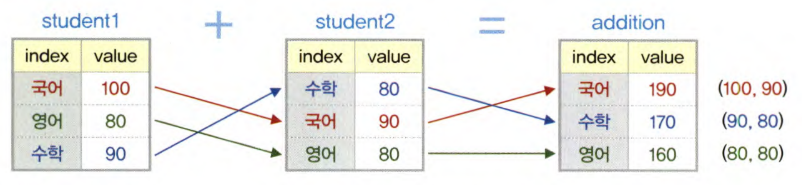

In [33]:
# 인덱스가 다르거나 값이 None이거나 등 문제가 있는 경우 연산 결과
import pandas as pd
import numpy as np

# 샘플 데이터 정의
student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

# 시리즈간 사칙연산(+, -, *, /)
addition = student1 + student2
subtraction = student1 - student2
multiplication = student1 * student2
division = student1 / student2

result = pd.DataFrame([addition, subtraction, multiplication, division], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

# NaN을 포함한 연산은 NaN(Not a Number)으로 처리
# 대응하는 인덱스가 없는 원소('영어')에 대한 연산 NaN으로 적용

,국어,수학,영어
덧셈,NaN,170.000,NaN
뺄셈,NaN,10.000,NaN
곱셈,NaN,7200.000,NaN
나눗셈,NaN,1.125,NaN


- 시리즈의 연산 메서드를 사용하면서 fill_value옵션을 주면 누락 데이터를 대체하는 값을 설정할 수 있음

In [34]:
# 누락 데이터를 채워서 연산
import pandas as pd
import numpy as np

student1 = pd.Series({'국어':np.nan, '영어':80, '수학':90})
student2 = pd.Series({'수학':80, '국어':90})

addition = student1.add(student2, fill_value=0)
subtraction = student1.sub(student2, fill_value=0)
multiplication = student1.mul(student2, fill_value=0)
division = student1.div(student2, fill_value=0)

result = pd.DataFrame([addition, subtraction, multiplication, division], index=['덧셈', '뺄셈', '곱셈', '나눗셈'])
result

# '영어'열의 나눗셈 결과 inf(무한대 infinity) n/0 연산의 결과

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


### 데이터프레임 연산
- 데이터프레임은 시리스의 리스트
- 시리즈 연산을 확장하는 개념으로 이해
- 행,열 인덱스를 기준으로 정렬하여 일대일로 대응되는 원소 간에 연산
- seaborn내장 데이터 활용
- Seaborn 내장 데이터셋의 종류 :  
    'anscombe', 'attention', 'brain_networks', 'car_crashes',  
    'diamonds'. 'dots', 'exercise', 'flights', 'fmri'. 'gammas',  
    'iris', 'mpg', 'planets', 'tips', 'titanic'

In [36]:
# 데이터프레임과 숫자 간의 연산
import pandas as pd
import seaborn as sns

# 타이타닉 데이터를 로딩하여 데이터프레임 생성
titanic = sns.load_dataset('titanic')

# '전체 행에서 age','fare' 열만 선택하여 데이터프레임 생성
df = titanic.loc[:, ['age','fare']]                          # 전체 자료 .loc[:] 에서 age, fare 열만 가져옴.
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [37]:
# 데이터프레임의 앞에서 5개의 행 확인
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [38]:
# 타입 확인
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [39]:
# 데이터 프레임에 산술 연산 적용 (브로드캐스트 Broadcast)
addition = df + 10
addition.head()

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500


- 데이터프레임간의 연산
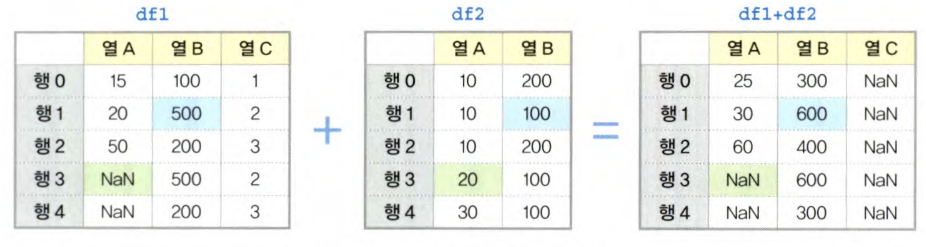

In [40]:
# 데이터프레임 간의 연산(문제가 있는 원소는 NaN으로 처리)
import pandas as pd
import seaborn as sns

# 타이타닉 데이터를 로딩하여 데이터프레임 생성
titanic = sns.load_dataset('titanic')

# '전체 행에서 age','fare' 열만 선택하여 데이터프레임 생성
df = titanic.loc[:, ['age','fare']]
df

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [41]:
# 데이터 프레임에 산술 연산 적용
addition = df + 10
addition.tail()                             # 위에서부터 : .head() ,  아래서부터 : .tail()

,age,fare
886,37.0,23.00
887,29.0,40.00
888,NaN,33.45
889,36.0,40.00
890,42.0,17.75


In [42]:
# 데이터 프레임에 산술 연산 적용
substraction = addition - df
substraction.tail()

,age,fare
886,10.0,10.0
887,10.0,10.0
888,NaN,10.0
889,10.0,10.0
890,10.0,10.0
